In [6]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import altair as alt
import matplotlib.pyplot as plt
import time

In [7]:
start_time = time.time()

In [8]:
# t-SNE on heart dataset

df = pd.read_csv("heart.csv") 
df
initial_list = df.to_numpy()

selected_columns = df[df.columns[0:12]]

new_df = selected_columns.copy()

list = new_df.to_numpy()

list_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(list)

a= pd.DataFrame(data = list_embedded
             , columns = ['component 1', 'component 2'])
 
embedded_df = a.reset_index().merge(df.reset_index(), left_index=True, right_index=True, how='left')

Label_for_color = ['A','B']
color_for_label = ['blue', 'red']

alt.Chart(embedded_df).mark_point(filled=True).encode(
           x = 'component 1',
           y = 'component 2',
           color=alt.Color('Cluster', scale=alt.
                    Scale(domain=Label_for_color, range=color_for_label)),
           tooltip = [
               alt.Tooltip('Cluster')
              ]).interactive()

alt.Chart(...)

In [9]:
end_time = time.time()
print('Time for t-SNE heart is: {}'.format( end_time - start_time))

Time for t-SNE heart is: 14.01280164718628


In [10]:
from IPython.core.display import Image
import numpy as np
import sklearn.datasets

!pip install umap-learn 

from IPython.core.display import Image
import numpy as np
import sklearn.datasets
!pip install umap-learn[plot]

import umap.plot

In [11]:
start_time_2 = time.time()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/usr/local/lib/python3.7/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


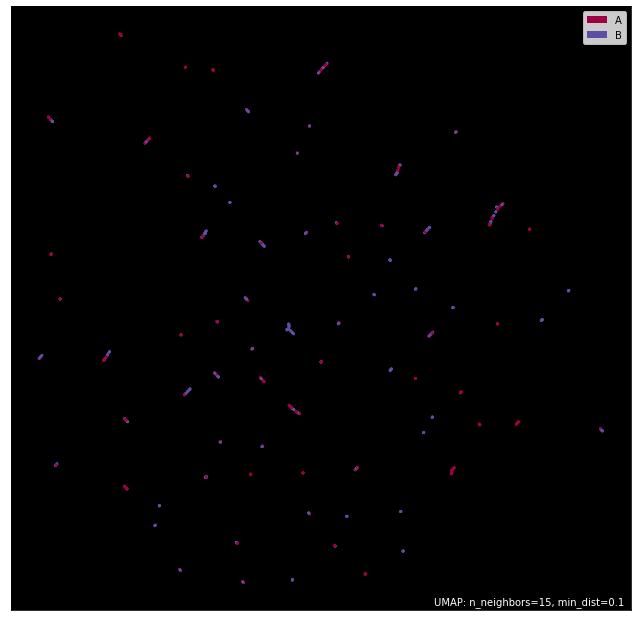

In [12]:
mapper = umap.UMAP().fit(list.data)
umap.plot.points(mapper, labels=df.Cluster,background='black')

In [13]:
end_time_2 = time.time()
print('Time for umap heart is: {}'.format( end_time_2 - start_time_2))

Time for umap heart is: 19.63031005859375
